<a href="https://colab.research.google.com/github/charu11/Neural-Networks-from-Scratch/blob/NNFS/Neural_networks_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an implementation of Neural networks from scratch referring the book "Neural Networks from Scratch" by Harison Kinsley and David Kukeila

In [1]:
!pip install nnfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import math
from IPython.display import Image
import nnfs
from nnfs.datasets import spiral_data
import time
nnfs.init()

# ***Single Neuron***

In [ ]:
inputs = [1,2,3]
weights = [0.2, 0.3, 0.4]
bias = 2

output = (inputs[0] * weights[0] +
          inputs[1] * weights[1] +
          inputs[2] * weights[2] + bias)

print(output)

4.0


# ***Layer of neurons***

In [ ]:
inputs = [1, 2, 3, 2.5]

weights1 = [0.2, 0.8, -0.5, 1]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

outputs = [
    # Neuron 1
    inputs[0] * weights1[0] +
    inputs[1] * weights1[1] +
    inputs[2] * weights1[2] +
    inputs[3] * weights1[3] + bias1 , 

    # Neuron 2
    inputs[0] * weights2[0] +
    inputs[1] * weights2[1] +
    inputs[2] * weights2[2] +
    inputs[3] * weights2[3] + bias2,

    inputs[0] * weights3[0] +
    inputs[1] * weights3[1] +
    inputs[2] * weights3[2] +
    inputs[3] * weights3[3] + bias3        
]


print(outputs)

[4.8, 1.21, 2.385]


*More Effcient way to calculate the output*

In [ ]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
# Output of current layer
outputs = []
# For each neuron

for neuron_weight, neuron_bias in zip(weights, biases):
  # Zeroed output of given neuron
  neuron_output = 0

  # For each input and weight to the neuron
  for n_input, weight in zip(inputs, neuron_weight):
    # Multiply this input by associated weight
    # and add to the neuron’s output variable
    neuron_output += n_input* weight

  # Add bias
  neuron_output += neuron_bias
  outputs.append(neuron_output)


print(outputs)


[4.8, 1.21, 2.385]


# ***Tensors, arrays, Vectors***

Tensors are closely-related to arrays. If you interchange tensor/array/matrix when it comes to
machine learning, people probably won’t give you too hard of a time. But there are subtle
differences, and they are primarily either the context or attributes of the tensor object. To
understand a tensor, let’s compare and describe some of the other data containers in Python
(things that hold data). Let’s start with a list. A Python list is defined by comma-separated
objects contained in brackets. So far, we’ve been using lists.


In [ ]:
list1 = [1,2,3,4]

list2 = [[1,5,6,2],
          [3,2,1,3]]

list3 =  [[[1,5,6,2],
          [3,2,1,3]],
          [[5,2,1,2],
          [6,4,8,4]],
          [[2,8,5,3],
          [1,1,9,4]]]


# above all the list can be an array because those are homologous( A list of lists is
#       homologous if each list along a dimension is identically long, and this must be true for each dimension).  


list4 = [[1,2,3,4],
         [5,6]]   # This can not be an array



***Matrix***

A matrix is pretty simple. It’s a rectangular array. It has columns and rows. It is two dimensional.
So a matrix can be an array (a 2D array). Can all arrays be matrices? No. An array can be far
more than just columns and rows, as it could have four dimensions, twenty dimensions, and so on.

In [ ]:
list_matrix_array = [[4,2],
                      [5,1],
                      [8,2]]

# the shape of this matrix is (3 * 2)




like in the list3, It has more than 2 dimenstions. 

The first level of this array contains 3 matrices: 




[[1,5,6,2],
[3,2,1,3]]

[[5,2,1,2],
[6,4,8,4]]

And

[[2,8,5,3],
[1,1,9,4]]


That’s what’s inside the most outer brackets and the size of this dimension is then 3. If we look at
the first matrix, we can see that it contains 2 lists — [1,5,6,2] and [3,2,1,3] so the size of
this dimension is 2 — while each list of this inner matrix includes 4 elements. These 4 elements
make up the 3rd and last dimension of this matrix since there are no more inner brackets.
Therefore, the shape of this array is (3, 2, 4) and it’s a 3-dimensional array, since the shape
contains 3 dimensions.

# Tensor

A tensor object is an object that can be represented as an array.
What this means is, as programmers, we can (and will) treat tensors as arrays in the context of
deep learning, and that’s really all the thought we have to put into it. Are all tensors just arrays?
No, but they are represented as arrays in our code, so, to us, they’re only arrays, and this is why
there’s so much argument and confusion.

# *Dot Product*

In [ ]:
a = [0,1,2]
b = [3,4,5]

dot_product = a[0] * b[0] + a[1] * b[1] + a[2] * b[2] 

print(dot_product)

14


# ***Single Neuron with Numpy***

In [ ]:
inputs = [1,2,3]
weights = [0.2, 0.3, 0.4]
bias = 2


outputs = np.dot(weights, inputs) + bias

print(outputs)

4.0


# ***A Layer of Neurons with Numpy***

In [ ]:
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]


layer_output = np.dot(weights, inputs) + biases

print(layer_output)

[4.8   1.21  2.385]


# A Batch of data

Often, neural networks expect to take in many samples at a time for two reasons. One reason
is that it’s faster to train in batches in parallel processing, and the other reason is that batches

help with generalization during training. If you fit (perform a step of a training process) on one
sample at a time, you’re highly likely to keep fitting to that individual sample, rather than
slowly producing general tweaks to weights and biases that fit the entire dataset. Fitting or
training in batches gives you a higher chance of making more meaningful changes to weights
and biases

# Matrix Product

The matrix product is an operation in which we have 2 matrices, and we are performing dot
products of all combinations of rows from the first matrix and the columns of the 2nd matrix,
resulting in a matrix of those atomic dot products:

***To perform a matrix product, the size of the second dimension of the left matrix must match the
size of the first dimension of the right matrix. For example, if the left matrix has a shape of (5, 4)
then the right matrix must match this 4 within the first shape value (4, 7). The shape of the
resulting array is always the first dimension of the left array and the second dimension of the right
array***

# **Transpose for the matrix product**

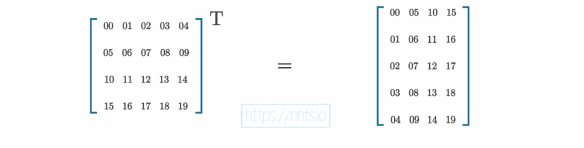

In [ ]:

Image('/content/drive/MyDrive/Neural Networks from Scratch/transposition matrix.PNG')

This is an example for the matrix transpose.

In [ ]:
a = [1,2,3,4]
b = [5,6,7,6]

a = np.array([a])
b = np.array([b]).T

In [ ]:
np.dot(a, b)

array([[62]])

# **A Layers of Neurons & Batch of Data**

we need to the dot product of inputs and weights in order to get the product between those 2. so those have to be done using the matrices products. 
following example shows the input and weights lists. both are (3, 4) matrices,

In [ ]:
inputs = [[1.3,2.1,3.0,4.6], 
          [2.3,5.6,-1.9,4.8], 
          [-1.5, 2.7, 5.4, 3.3]]

weights = [[0.2, 0.4, 0.8, 1.0],
           [.7, -0.4, -0.1, 0.6], 
           [2.1, 1.1, 0.2, -1.1]]   

bias = [2.0, 1.0, 0.5]                  

To do the dot product on matrix row count of first matrix should be equal to the column count of the second matrix. but above the size is same which is (3,4)
this is why we need Transpose to get the multiplication done

In [ ]:
layer1_output = np.dot(inputs, np.array(weights).T) + bias

In [ ]:
layer1_output

array([[10.1 ,  3.53,  1.08],
       [ 7.98,  3.44,  5.83],
       [10.4 ,  0.31, -2.23]])

# **Adding Layers**

When adding the layers, most important factor to keep in mind is that, the new inputs should always be equal with the output of the previous layer

In [ ]:
# weights2 and bias2 is the weights of new hidden layer

weights2 = [[0.1, 0.2, 0.4],
           [.35, -0.2, -0.05], 
           [1.55, 0.55, 0.1]]   

bias2 = [1.0, 0.5, 0.25]  

In [ ]:
layer2_output = np.dot(output, np.array(weights2).T) + bias2

All Together now

In [ ]:
import numpy as np

inputs = [[1.3,2.1,3.0,4.6], 
          [2.3,5.6,-1.9,4.8], 
          [-1.5, 2.7, 5.4, 3.3]]

weights = [[0.2, 0.4, 0.8, 1.0],
           [.7, -0.4, -0.1, 0.6], 
           [2.1, 1.1, 0.2, -1.1]]   

bias = [2.0, 1.0, 0.5]    

weights2 = [[0.1, 0.2, 0.4],
           [.35, -0.2, -0.05], 
           [0.55, 0.55, 0.1]]   

bias2 = [1.0, 0.5, 0.25] 

layer1_output = np.dot(inputs, np.array(weights).T) + bias
layer2_output = np.dot(layer1_output, np.array(weights2).T) + bias2

print(layer2_output)

[[3.148  3.275  7.8545]
 [4.818  2.3135 7.114 ]
 [1.21   4.1895 5.9175]]


***Dense Layer Class***

Now that we no longer need to hand-type our data, we should create something similar for our
various types of neural network layers. So far, we’ve only used what’s called a dense or
fully-connected layer. These layers are commonly referred to as “dense” layers in papers,
literature, and code, but you will occasionally see them called fully-connected or “fc” for short in
code. Our dense layer class will begin with two methods.


 np.random.randn produces a Gaussian distribution with a
mean of 0 and a variance of 1, which means that it’ll generate random numbers, positive and
negative, centered at 0 and with the mean value close to 0. 

In [ ]:
print(np.random.randn(2, 5)) #this will generate a matrix of (2 x 5)

[[ 0.30691436  0.21551427 -1.19834326  0.73925335 -0.70290135]
 [-1.15208869  0.18523585 -0.32225246  1.46395161 -0.52719711]]


In [ ]:
######################################################################### Dense Layer Class #######################################################################

In [ ]:
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.01* np.random.randn(n_inputs, n_neurons)
    self.bias = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.bias  

# Chapter 04

***Activation Functions***

In this chapter, we will tackle a few of the activation functions and discuss their roles. We use
different activation functions for different cases, and understanding how they work can help you
properly pick which of them is best for your task. The activation function is applied to the output
of a neuron (or layer of neurons), which modifies outputs. We use activation functions because if
the activation function itself is nonlinear, it allows for neural networks with usually two or more
hidden layers to map nonlinear functions. We’ll be showing how this works in this chapter.
In general, your neural network will have two types of activation functions. The first will be the
activation function used in hidden layers, and the second will be used in the output layer. Usually,
the activation function used for hidden neurons will be the same for all of them, but it doesn’t
have to.

***Step activation function***

Recall the purpose this activation function serves is to mimic a neuron “firing” or “not firing”
based on input information. The simplest version of this is a step function. In a single neuron, if
the weights · inputs + bias results in a value greater than 0, the neuron will fire and output a 1;
otherwise, it will output a 0.


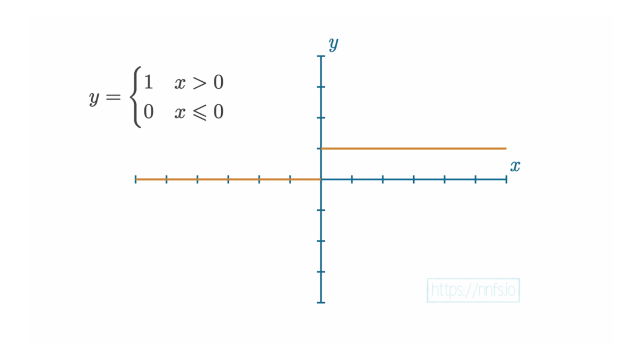

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Neural Networks from Scratch/step actiavtion function.PNG')

step activation function rarely using these days

***Linear activation function***

A linear function is simply the equation of a line. It will appear as a straight line when graphed,
where y=x and the output value equals the input.

This activation function is usually applied to the last layer’s output in the case of a regression
model — a model that outputs a scalar value instead of a classification

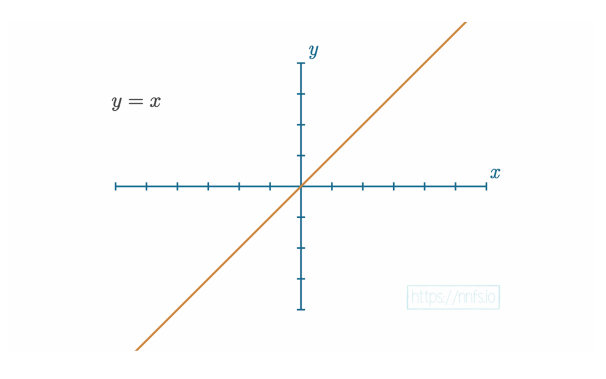

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/linear activation function.PNG')

***Sigmoid activation function***

it’s usually better to have a more granular approach
for the hidden neuron activation functions. In this case, we’re getting a value that can be
reversed to its original value; the returned value contains all the information from the input,
contrary to a function like the step function, where an input of 3 will output the same value as an
input of 300,000. The output from the Sigmoid function, being in the range of 0 to 1, also works
better with neural networks — especially compared to the range of the negative to the positive
infinity — and adds nonlinearity

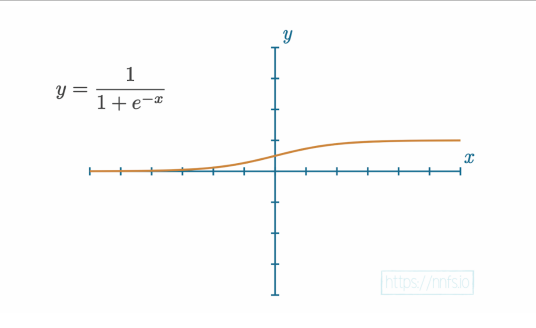

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/sigmoid.PNG')

Rectified linear activation function

The rectified linear activation function is simpler than the sigmoid. It’s quite literally y=x, clipped
at 0 from the negative side. If x is less than or equal to 0, then y is 0 — otherwise, y is equal to x.


This simple yet powerful activation function is the most widely used activation function at the
time of writing for various reasons — mainly speed and efficiency. While the sigmoid activation
function isn’t the most complicated, it’s still much more challenging to compute than the ReLU
activation function. The ReLU activation function is extremely close to being a linear activation
function while remaining nonlinear, due to that bend after 0(below images shows). This simple property is, however,
very effective.

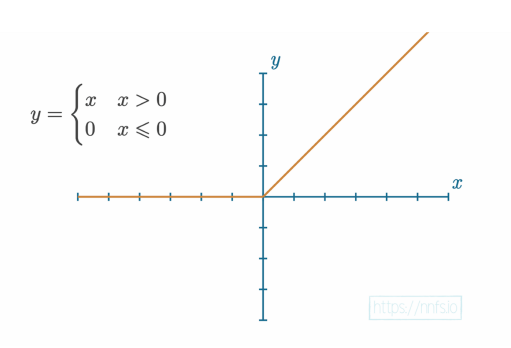

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/relu.PNG')

***Use of activation functions***

Now that we understand what activation functions represent, how some of them look, and what
they return, let’s discuss why we use activation functions in the first place. In most cases, for a
neural network to fit a nonlinear function, we need it to contain two or more hidden layers, and
we need those hidden layers to use a nonlinear activation function.
First off, what’s a nonlinear function? A nonlinear function cannot be represented well by a
straight line, such as a sine function:


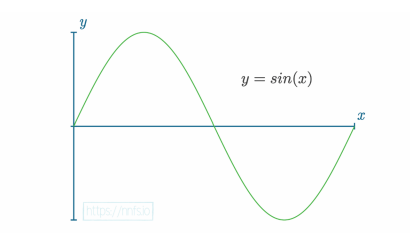

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/sinx.PNG')

While there are certainly problems in life that are linear in nature, for example, trying to figure
out the cost of some number of shirts, and we know the cost of an individual shirt, and that there
are no bulk discounts, then the equation to calculate the price of any number of those products is a
linear equation. Other problems in life are not so simple, like the price of a home. The number of
factors that come into play, such as size, location, time of year attempting to sell, number of
rooms, yard, neighborhood, and so on, makes the pricing of a home a nonlinear equation. Many of
the more interesting and hard problems of our time are nonlinear. The main attraction for neural
networks has to do with their ability to solve nonlinear problems. First, let’s consider a situation
where neurons have no activation function, which would be the same as having an activation
function of y=x. With this linear activation function in a neural network with 2 hidden layers of 8
neurons each, the result of training this model will look like:


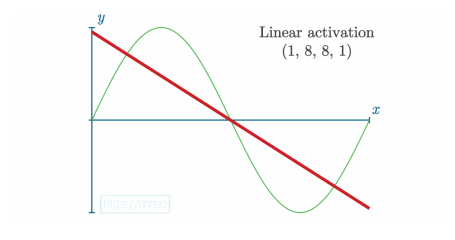

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/sinx linear.PNG')

When using the same 2 hidden layers of 8 neurons each with the rectified linear activation
function, we see the following result after training:


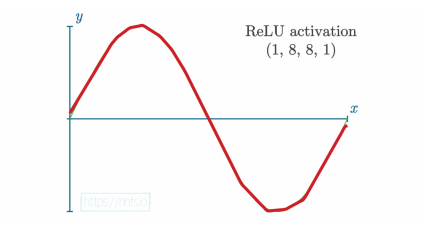

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/sinx relu.PNG')

***Linear activation in hidden layers***

Now that you can see that this is the case, we still should consider why this is the case. To begin,
let’s revisit the linear activation function of y=x, and let’s consider this on a singular neuron level.
Given values for weights and biases, what will the output be for a neuron with a y=x activation
function? Let’s look at some examples — first, let’s try to update the first weight with a positive
value:


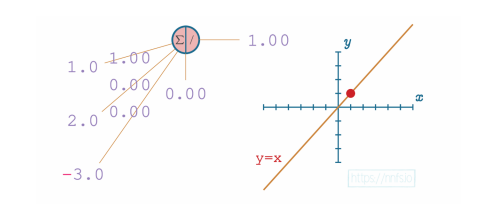

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/linear activation hidden layers.PNG')

In [ ]:
#input * weight + bias
(1.0 * 1.00) + (2.0 * 0.00) + (-3.0 * 0.00) + 0.00

1.0

after the calculation of our inputs, the value of x would be 1.0. since we are using linear function as our activation function the output of that activation fucnction is similar to the x value

No matter what we do with this neuron’s weights and biases, the output of this neuron will be
perfectly linear to y=x of the activation function. This linear nature will continue throughout the
entire network:

***ReLU Activation Function in pair of neurons***

Lets start with a single neuron with zero wieght and zero bias. This is how the RElu activation function works.

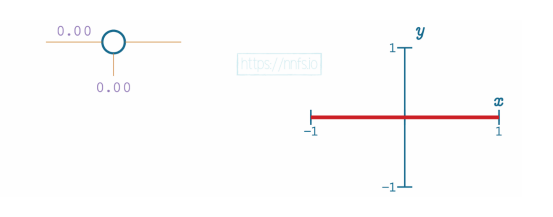

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/relu1.PNG')

Now let's increase the weight to 1 and keep bias as 0

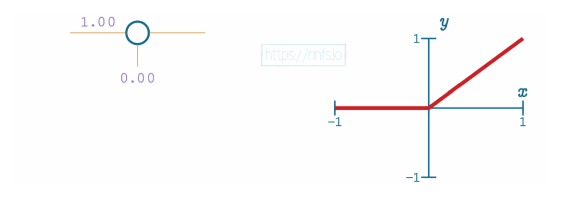

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/relu2.PNG')

Now lets increase the bias as well. now both weight and bias has a value.

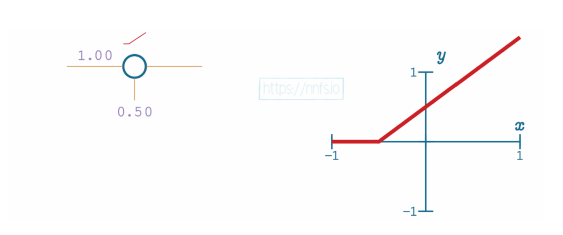

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/relu3.PNG')

What happens when we have, rather than just the one neuron, a pair of neurons? For example,
let’s pretend that we have 2 hidden layers of 1 neuron each. Thinking back to the y=x activation
function, we unsurprisingly discovered that a linear activation function produced linear results no
matter what chain of neurons we made. Let’s see what happens with the rectified linear function
for the activation. We’ll begin with the last values for the 1st neuron and a weight of 1, with a
bias of 0, for the 2nd neuron:


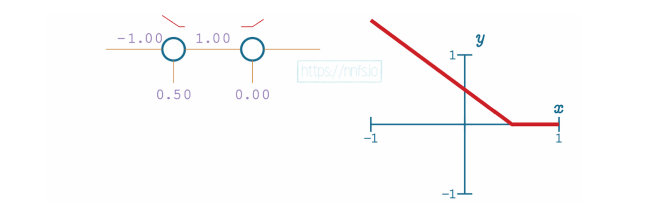

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/relu5.PNG')

As you can see there's no much diffence because weight of the second neuron is 1 and the bias is 0. that doesnt make any diffence for out output. 

Now let's change the values again and see there's any change in the graph.this time we add 1 to the bias.


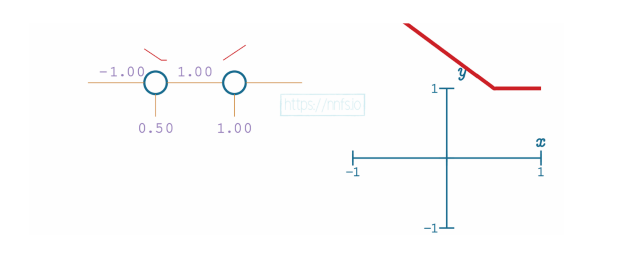

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/relu6.PNG')

Now we see some fairly interesting behavior. The bias of the second neuron indeed shifted the
overall function, but, rather than shifting it horizontally, it shifted the function vertically. What
then might happen if we make that 2nd neuron’s weight -2 rather than 1?

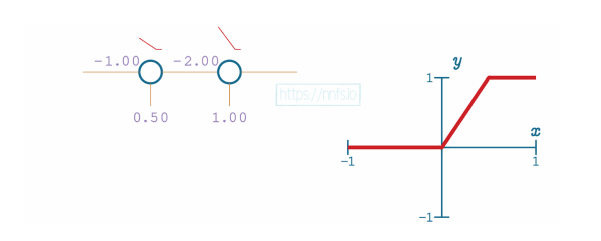

In [ ]:
Image('/content/drive/MyDrive/Neural Networks from Scratch/relu7.PNG')

ReLU Activation Function Code

In [ ]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

outputs = [i if i>0 else 0 for i in inputs]



for this we can use another simpler way

In [ ]:
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

#### this max function returns the maximum value between 0 and the value of i
outputs = [max(0, i) for i in inputs]

In [ ]:
outputs

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [ ]:
##### lets make much more simpler using the numpy

inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]

outputs = np.maximum(0, inputs)
print(outputs)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [ ]:
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.01* np.random.randn(n_inputs, n_neurons)
    self.bias = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.bias  

class Activation_ReLU:

  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

In [ ]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense1.forward(X)

activation1.forward(dense1.output)

print(activation1.output[:10])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.0287432e-05 0.0000000e+00 0.0000000e+00]
 [9.1045447e-05 0.0000000e+00 0.0000000e+00]
 [1.1607886e-04 0.0000000e+00 0.0000000e+00]
 [1.8409541e-04 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 2.2004667e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.4466775e-04]
 [0.0000000e+00 0.0000000e+00 7.8865787e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]


# **Softmax Activation Function**

In our case, we’re looking to get this model to be a classifier, so we want an activation function
meant for classification. One of these is the Softmax activation function. First, why are we
bothering with another activation function? It just depends on what our overall goals are. In this
case, the rectified linear unit is unbounded, not normalized with other units, and exclusive. “Not
normalized” implies the values can be anything, an output of [12, 99, 318] is without context, and
“exclusive” means each output is independent of the others. To address this lack of context, the
softmax activation on the output data can take in non-normalized, or uncalibrated, inputs and
produce a normalized distribution of probabilities for our classes. In the case of classification,
what we want to see is a prediction of which class the network “thinks” the input represents. This
distribution returned by the softmax activation function represents confidence scores for each
class and will add up to 1. The predicted class is associated with the output neuron that returned
the largest confidence score. Still, we can also note the other confidence scores in our overarching
algorithm/program that uses this network. For example, if our network has a confidence
distribution for two classes: [0.45, 0.55], the prediction is the 2nd class, but the confidence in this
prediction isn’t very high. Maybe our program would not act in this case since it’s not very
confident.


How Softmax works

The first step for us is to “exponentiate” the outputs. We do this with Euler’s number, e, which is
roughly 2.71828182846 and referred to as the “exponential growth” number. Exponentiating is
taking this constant to the power of the given parameter:
y=e^x

Both the numerator and the denominator of the Softmax function contain e raised to the power of
z, where z, given indices, means a singular output value — the index i means the current sample
and the index j means the current output in this sample. The numerator exponentiates the current
output value and the denominator takes a sum of all of the exponentiated outputs for a given
sample. We need then to calculate these exponentiates to continue:

In [ ]:
layer_output = [1,2,3,4,5,6]

E =  2.71828182846 

exp_values = [E ** values  for values in layer_output]

print(exp_values)

[2.71828182846, 7.38905609893584, 20.085536923208828, 54.59815003322094, 148.41315910283723, 403.4287934935852]


Exponentiation serves multiple purposes. To calculate the probabilities, we need non-negative
values. Imagine the output as [4.8, 1.21, -2.385] — even after normalization, the last
value will still be negative since we’ll just divide all of them by their sum. A negative probability
(or confidence) does not make much sense. An exponential value of any number is always
non-negative — it returns 0 for negative infinity, 1 for the input of 0, and increases for positive
values:

The exponential function is a monotonic function which means that with higher inputs, outputs are also higher. once we have exponentiated, we want to convert those numbers to a probability distribution . which means we are going to perform a normalization method where we take a given exponentiated value and divide by the sum of all the exponentiated values. since each output value normalized to a fraction of the sum, all the values reside between 0 and 1. 
let's add the sum and normalization to the code.


In [ ]:

layer_output = [1,2,3,4,5,6]

E =  2.71828182846 

exp_values = [E ** values  for values in layer_output]


norm_base = sum(exp_values)
norm_values = [value/norm_base for value in exp_values]

print("Exponentiated values are :")
print(exp_values)
print("="*50)

print("normalized values are:")
print(norm_values)
print("="* 50)

print(f"sum of normalized values are: {np.sum(norm_values)}")


Exponentiated values are :
[2.71828182846, 7.38905609893584, 20.085536923208828, 54.59815003322094, 148.41315910283723, 403.4287934935852]
normalized values are:
[0.004269778545275463, 0.011606461431170664, 0.031549633201073055, 0.0857607946250552, 0.2331220096235776, 0.6336913225738481]
sum of normalized values are: 1.0


Let's do the same implementation using numpy.

In [ ]:

layer_output = [1,2,3,4,5,6]

exp_values = np.exp(layer_output)

norm_values = exp_values / np.sum(exp_values)

print("Exponentiated values are :")
print(exp_values)
print("="*50)

print("normalized values are:")
print(norm_values)
print("="* 50)

print(f"sum of normalized values are: {np.sum(norm_values)}")



Exponentiated values are :
[  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591
 403.42879349]
normalized values are:
[0.00426978 0.01160646 0.03154963 0.08576079 0.23312201 0.63369132]
sum of normalized values are: 1.0


***Important***

When we train in batches we need to convert this functionality to accept layer in batches. to do that we can use as following.

In [ ]:
inputs = [[1.3,2.1,3.0,4.6], 
          [2.3,5.6,-1.9,4.8], 
          [-1.5, 2.7, 5.4, 3.3]]  # this(inputs) is defined earlier so we use the same values
exp_values = np.exp(inputs)


In [ ]:
probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
probabilities

array([[2.79235018e-02, 6.21448962e-02, 1.52851780e-01, 7.57079822e-01],
       [2.48076610e-02, 6.72601154e-01, 3.72005186e-04, 3.02219180e-01],
       [8.46402161e-04, 5.64434547e-02, 8.39863463e-01, 1.02846680e-01]])

by using axis=1 gives us the freedom to get the sum in every row. not whole array. if we exclude the axis=1, then we get completely different values for probabilities.

***Avoiding Dead Neurons and Exploding values***

dead neurons and exploding values can cause chaos inside our model. so we need to avoid that to happen. for an example, when the input get larger(1000) we can see an "Overflow error happening". we need to avoid this.

so we know that when exp function tends towards to the 0 when the values approaches to the negative infinity. and the output tends towards to 1 when the input is 0.

so how we can avoid this?

the solution is to subtract input by max value of its list. then we have a situation where the values always in the range of 0 to 1. beacuse if we subtract smaller value from its max value then we have a large negative value whose exp value would be closer to 0 and on the other hand if we substract max value by itself then we get 0 whose exp value is 1. that's how we end up in values between 0 and 1. and that is exaclty the range we need. 

lets create the softmax class

In [ ]:
class Activation_Softmax:

  def forward(self, inputs):

    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    self.output = probabilities

***Full Code upto this point***

In [ ]:
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.01* np.random.randn(n_inputs, n_neurons)
    self.bias = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.bias  

class Activation_ReLU:

  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

class Activation_Softmax:

  def forward(self, inputs):

    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    self.output = probabilities

In [ ]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

In [ ]:
print(activation2.output[:5])


[[0.33333334 0.33333334 0.33333334]
 [0.33333355 0.33333322 0.3333332 ]
 [0.33333382 0.33333313 0.3333331 ]
 [0.3333341  0.33333302 0.33333293]
 [0.33333433 0.3333329  0.33333278]]


# **Chapter 05**

***Calculating Network Error with Loss***

When we train a model we need that model to perform very well. to identify how well our model perform, we can calculate how much error the model has. the function that calculate our model error is called **loss function** or **cost function**. 

***Categorical Cross-entropy loss***

Since we are building a classification neural network, we cannot use loss functions such as squared error/ mean squared error. when we have softmax funcion as our output layer which means that we are expecting a probablity distribution as our output then categorical cross-entropy loss is explicilty used to compare the predictions. the formula to calculate the categorical cross-entropy as follows

L(i) = -Σy(i,j)log(y1(i,j))

where, <br>L(i) = sample loss values
<br>
i = ith sample
<br>
j = label/output index
<br>
y = target values
<br>
y1 = predicted values

lets understand our formula with one example. 
<br>
imaging we get [0.7, 0.2, 0.1] as final output. and our targets are [1,  0, 0]. so we can apply the calculations as follows.
<br>
L(i) = -(1.log(0.7) + 0.log(0.2) + 0.log(0.1))<br>
L(i) = -(-0.356674943 + 0 + 0) <br>
L(i) = 0.356674943

lets use python for the calculations

In [5]:
softmax_output = [0.7, 0.2, 0.1]
target = [1,0,0]

loss = -(target[0] * math.log(softmax_output[0]) +
         target[1] * math.log(softmax_output[1]) +
         target[2] * math.log(softmax_output[2]))

print(loss)

0.35667494393873245


Now we need to update our loss function to work with batches and we need the negative log function looks dynamic